In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('05-MLR-correct.xlsx',sheet_name='Data')

In [ ]:
df.head()

,Unnamed: 0,Y,X1,X2,Unnamed: 4,Unnamed: 5,Unnamed: 6,GPA at college,Entrance exam,interview
0,record,GPA at college,Entrance exam,interview,NaN,NaN,GPA at college,1,0.74666,0.763283
1,1,9.5,9.8,9.1,NaN,NaN,Entrance exam,0.74666,1,0.540056
2,2,6.3,7.5,7.1,NaN,NaN,interview,0.763283,0.540056,1
3,3,8.2,7.9,7.7,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9.1,9.5,9.6,NaN,NaN,NaN,GPA at college,Entrance exam,interview


In [ ]:
df2 = df[['Y','X1','X2']]

In [ ]:
df2

,Y,X1,X2
0,GPA at college,Entrance exam,interview
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6
5,8.2,9.1,7.5
6,8.32,8.5,8.4
7,9.6,7.54,9.5
8,7.6,8.4,7.8
9,6.5,5.6,7.8


In [ ]:
df2=df2.drop([0])

In [ ]:
df2

,Y,X1,X2
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6
5,8.2,9.1,7.5
6,8.32,8.5,8.4
7,9.6,7.54,9.5
8,7.6,8.4,7.8
9,6.5,5.6,7.8
10,8.64,8,8.5


In [ ]:
df2 = df2.drop([16,17,18,19])

In [ ]:
df2.rename(columns={'Y':'GPA','X1':'Entrance','X2':'Interview'},inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   GPA        15 non-null     object
 1   Entrance   15 non-null     object
 2   Interview  15 non-null     object
dtypes: object(3)
memory usage: 480.0+ bytes


In [ ]:
df2 = df2.astype(float)

In [ ]:
df2.head()

,GPA,Entrance,Interview
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6
5,8.2,9.1,7.5


In [ ]:
df2.shape

(15, 3)

In [ ]:
df2 = df2.reset_index()

In [ ]:
df2.head()

,index,GPA,Entrance,Interview
0,1,9.5,9.8,9.1
1,2,6.3,7.5,7.1
2,3,8.2,7.9,7.7
3,4,9.1,9.5,9.6
4,5,8.2,9.1,7.5


In [ ]:
df2 = df2[['GPA','Entrance','Interview']]

In [ ]:
import seaborn as sns

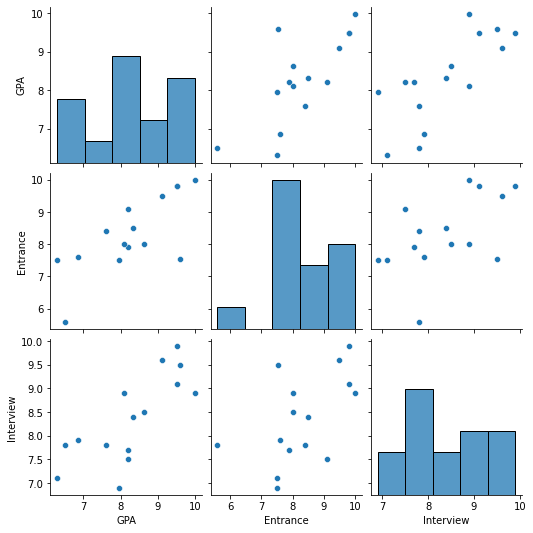

In [ ]:
sns.pairplot(df2)

In [ ]:
import statsmodels.formula.api as smf
import pandas.util.testing as tm

In [ ]:
model2 = smf.ols(formula='GPA ~ Entrance + Interview', data=df2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     17.12
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           0.000305
Time:                        06:31:13   Log-Likelihood:                -12.591
No. Observations:                  15   AIC:                             31.18
Df Residuals:                      12   BIC:                             33.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7044      1.577     -0.447      0.6

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from statsmodels.tools.tools import add_constant

In [ ]:
[variance_inflation_factor(df2[['Entrance','Interview']].values,i) for i in range(len(df2[['Entrance','Interview']].columns))]

[70.71751524574418, 70.71751524574418]

In [ ]:
[variance_inflation_factor(add_constant(df2[['Entrance','Interview']]).values,i) for i in range(len(add_constant(df2[['Entrance','Interview']]).columns))]

[95.05280153277468, 1.4117515216441017, 1.4117515216441017]

Residuals

In [ ]:
df4= pd.DataFrame()
df4['prediction'] = results2.fittedvalues.copy()
df4['observed'] = df2['GPA'].values.copy()
df4['res'] = df4['observed'] - df4['prediction']

In [ ]:
df4.head()

,prediction,observed,res
0,9.423712,9.5,0.076288
1,7.131188,6.3,-0.831188
2,7.686867,8.2,0.513133
3,9.598331,9.1,-0.498331
4,8.108897,8.2,0.091103


In [ ]:
df4['res2'] = df4['res']*df4['res']

In [ ]:
RMSEModel2 = sum(list(df4['res2']))/df2.shape[0]

In [ ]:
np.sqrt(RMSEModel2)

0.5601627923901479

**Using sklearn**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
regModel2 = linear_model.LinearRegression()

In [ ]:
regModel2.fit(np.array(df2[['Entrance','Interview']]).reshape(-1,2), np.array(df2['GPA']).reshape(-1,1))

LinearRegression()

In [ ]:
print("Coefficient: \n", regModel2.coef_)

Coefficient: 
 [[0.45544232 0.62250322]]


In [ ]:
print("Intercept: \n", regModel2.intercept_)

Intercept: 
 [-0.70440195]


In [ ]:
df2['predSKLearnTransform'] = regModel2.predict(np.array(df2[['Entrance','Interview']]).reshape(-1,2))

In [ ]:
df2

,GPA,Entrance,Interview,predSKLearnTransform
0,9.50,9.80,9.1,9.423712
1,6.30,7.50,7.1,7.131188
2,8.20,7.90,7.7,7.686867
3,9.10,9.50,9.6,9.598331
4,8.20,9.10,7.5,8.108897
5,8.32,8.50,8.4,8.395885
6,9.60,7.54,9.5,8.643414
7,7.60,8.40,7.8,7.976839
8,6.50,5.60,7.8,6.701600
9,8.64,8.00,8.5,8.230414


In [ ]:
print("RMSE:%.4f" % np.sqrt(mean_squared_error(np.array(df2['GPA']).reshape(-1,1), np.array(df2['predSKLearnTransform']).reshape(-1,1))))
print("R squared: %.4f" % r2_score(np.array(df2['GPA']).reshape(-1,1), np.array(df2['predSKLearnTransform']).reshape(-1,1)))

RMSE:0.5602
R squared: 0.7405


In [ ]:
adjusted_Rsquared = 1 - (1-r2_score(np.array(df2['GPA']).reshape(-1,1), np.array(df2['predSKLearnTransform']).reshape(-1,1))) * (df2.shape[0]-1)/(df2.shape[0]-2-1)

In [ ]:
adjusted_Rsquared

0.6972610997850923